# Exercises Part 1

In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import seaborn as sns
from pydataset import data

iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 1. What does the distribution of petal lengths look like?

* It appears that many are of length 1 and another cluster was around 4-5

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

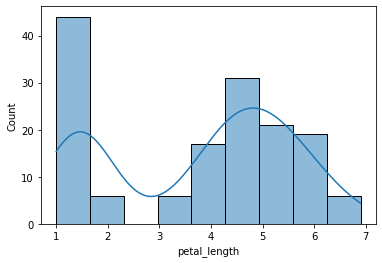

In [8]:
sns.histplot(iris.petal_length, kde=True)

### 2. Is there a correlation between petal length and petal width?

* There is a very strong correlation between petal length and width. 

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


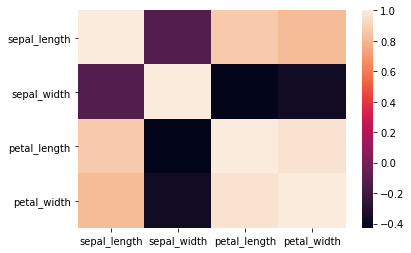

In [14]:
corr = iris.corr()
sns.heatmap(corr)
corr

### 3. Would it be reasonable to predict species based on sepal width and sepal length?

* It appears that it could be reasoned that you could predict the Setosa species with BOTH the length and width of the sepal with a reasonable accuracy. This is due to the data being distributed enough between the species when each factor is taken into account. However, the other two species (Versicolor & Virginica) seem to have a large degree of overlap which would make it difficult to detect species.

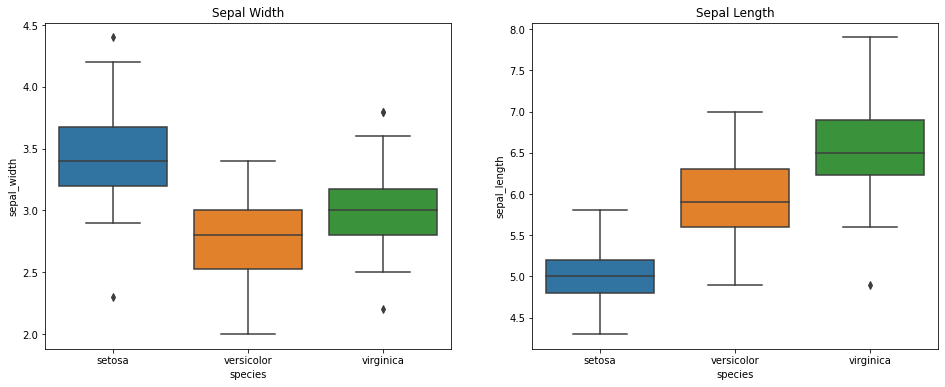

In [222]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
plt1 = sns.boxplot(x=iris.species, y=iris.sepal_width, ax=ax[0]).set_title(
'Sepal Width')
plt2 = sns.boxplot(x=iris.species, y=iris.sepal_length, ax=ax[1]).set_title(
'Sepal Length')




### 4. Which features would be best used to predict species?
* It appears that there is enough variation between the petal length and width to reasonably assume that we could predict the species with this data.


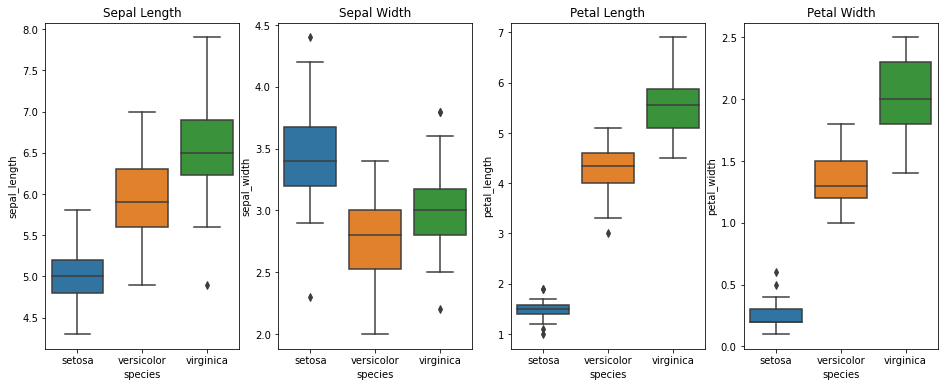

In [195]:
fig, ax = plt.subplots(1,4, figsize=(16, 6))
plt1 = sns.boxplot(x=iris.species, y=iris.sepal_length, ax=ax[0]).set_title(
'Sepal Length')
plt2 = sns.boxplot(x=iris.species, y=iris.sepal_width, ax=ax[1]).set_title(
'Sepal Width')
plt1 = sns.boxplot(x=iris.species, y=iris.petal_length, ax=ax[2]).set_title(
'Petal Length')
plt2 = sns.boxplot(x=iris.species, y=iris.petal_width, ax=ax[3]).set_title(
'Petal Width')

# Exercises Part 2

### 1. Using the lesson as an example, use seaborn's `load_dataset` function to load the `anscombe` data set. Use pandas to group the data by the `dataset` column, and calculate summary statistics for each dataset. What do you notice?
* There is the same sample size in each x, y parameters and the dataset in x seems to be almost identical except in dataset IV. The data of y has almost the exact same mean and std, but the min and maxes are different for y var.

In [221]:
anscombe = sns.load_dataset('anscombe')
anscombe.groupby('dataset')
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### 1a. Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

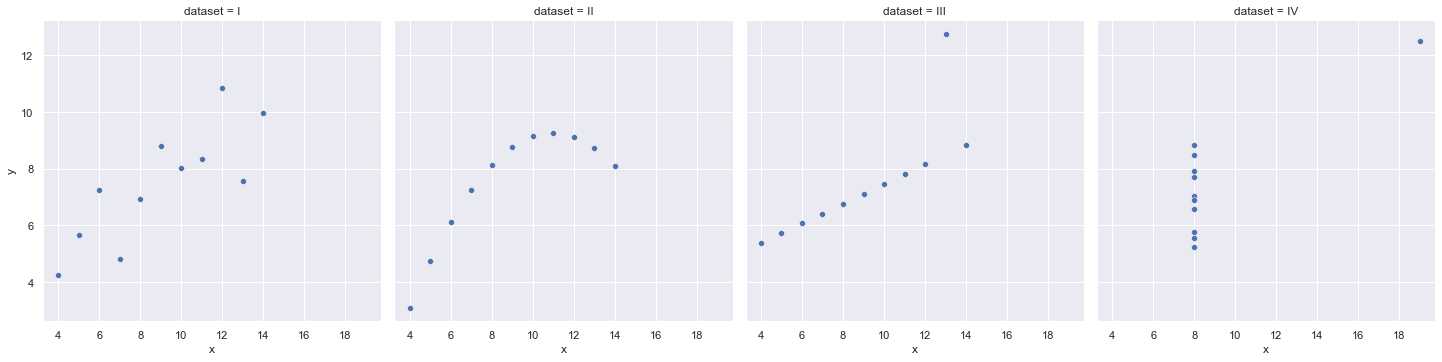

In [244]:

sns.relplot(x='x', y='y', col='dataset', data=anscombe)
plt.show()

### 2. Load the `InsectSprays` dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

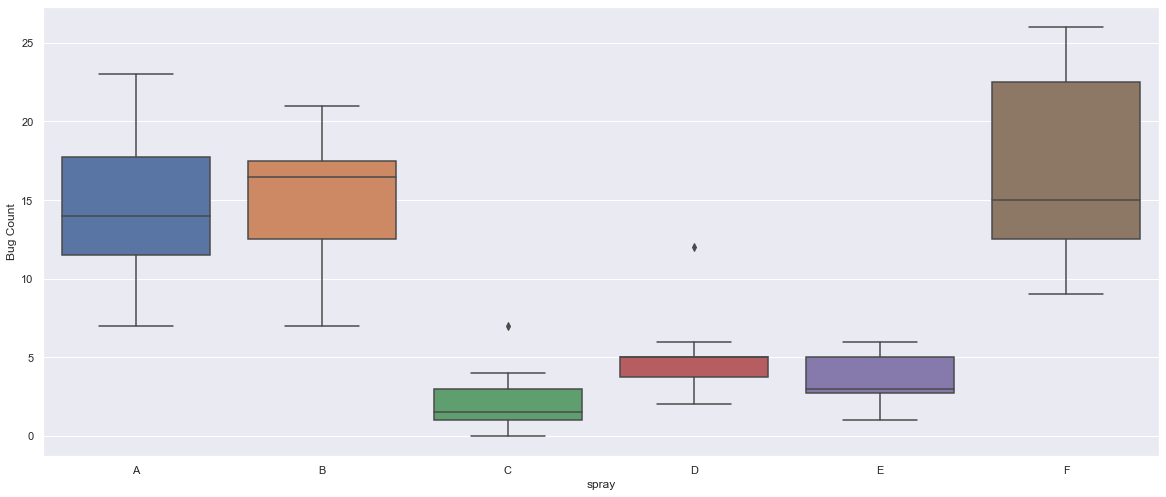

In [266]:
ins = data('InsectSprays')
sns.boxplot(data=ins, y='count', x='spray')
plt.ylabel('Bug Count')
plt.show()


### 3. Load the `swiss` dataset and read it's documentation. Create visualizations to answer the following questions:

In [273]:
swiss = data('swiss')
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


### 3a. Create an attribute named `is_catholic` that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [287]:
# Cutoff for which area is considered NOT catholic will be anything less than 40%
cs = swiss.assign(is_catholic = swiss.Catholic>=40)


### 3b. Does whether or not a province is Catholic influence fertility?
* It seems that if the province is Catholic then it's fertility is higher.

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

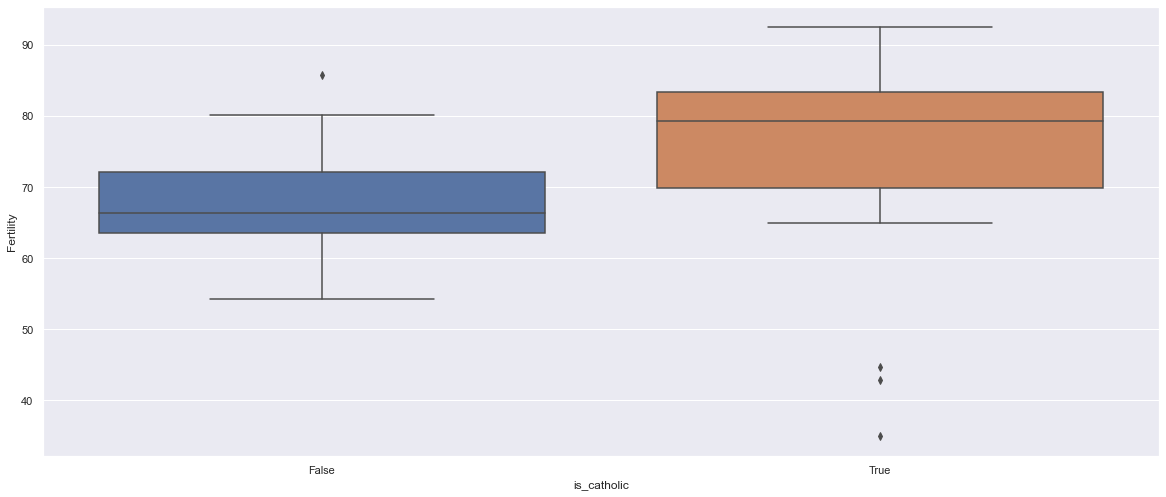

In [289]:
sns.boxplot(data=cs, x='is_catholic', y='Fertility')

### 3c. What measure correlates most strongly with fertility?
